In [18]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install sklearn
# !pip install imbalanced-learn
!pip install lightgbm
# !pip install xgboost

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from collections import Counter   

In [3]:
# 데이터 불러오기
df = pd.read_csv('./data/data.csv')
# df.head(3)

X = df.drop(['id','hire_state','b022', 'b023', 'b036', 'b038', 'b039', 'b040'],axis=1)
y = df['hire_state']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

먼저 모델 돌려봄

In [4]:
# 의사결정 나무
tree = DecisionTreeClassifier()

dt_clf = DecisionTreeClassifier(random_state=0, max_depth=3)   # max_depth : 가지치기 (최대 깊이 지정)
dt_clf.fit(X_train, y_train)

print("의사결정나무 정확도:", dt_clf.score(X_train, y_train), dt_clf.score(X_test, y_test))

의사결정나무 정확도: 0.7015742642026009 0.6918142160636387


In [11]:
# 랜덤 포레스트
rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_features='sqrt',  # 특성의 일부만 사용
    random_state=42
)

rf_clf.fit(X_train, y_train)
print("랜덤 포레스트 정확도:", rf_clf.score(X_train, y_train), rf_clf.score(X_test, y_test))

랜덤 포레스트 정확도: 1.0 0.7151655119322555


In [12]:
# xgboost
xgb_clf = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=0
)

xgb_clf.fit(X_train, y_train)

y_pred_train = xgb_clf.predict(X_train)
y_pred_test = xgb_clf.predict(X_test)

print("xgboost 정확도:", accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test))

xgboost 정확도: 0.7396475017111568 0.7244033872209392


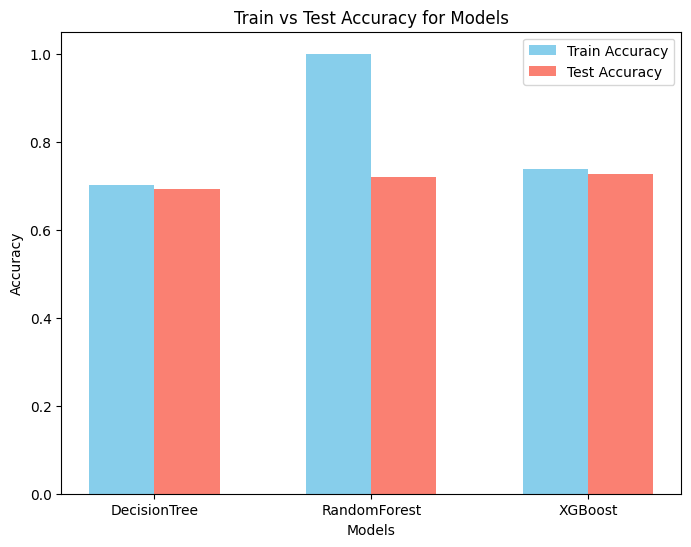

In [45]:
# 모델 및 정확도 데이터
models = ['DecisionTree', 'RandomForest', 'XGBoost']
train_acc = [0.7016, 1.0000, 0.7375]  # Train Accuracy
test_acc = [0.6918, 0.7208, 0.7275]   # Test Accuracy

# x축 위치 설정
x = np.arange(len(models))
width = 0.3  # 막대 너비

# 그래프 크기 설정
plt.figure(figsize=(8, 6))

# 바 그래프 추가
plt.bar(x - width/2, train_acc, width, label='Train Accuracy', color='skyblue')
plt.bar(x + width/2, test_acc, width, label='Test Accuracy', color='salmon')

# 그래프 제목 및 라벨
plt.title('Train vs Test Accuracy for Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(x, models)  # x축 눈금 설정
plt.ylim(0, 1.05)  # y축 범위 설정
plt.legend()

# 그래프 출력
plt.show()

In [13]:
y_pred = dt_clf.predict(X_test)
confusion_matrix(y_test, y_pred, labels=[0, 1])

array([[ 274,  925],
       [ 276, 2422]])

In [22]:
y_pred = rf_clf.predict(X_test)
confusion_matrix(y_test, y_pred, labels=[0, 1])

array([[ 277,  922],
       [ 188, 2510]])

In [23]:
y_pred = xgb_clf.predict(X_test)
confusion_matrix(y_test, y_pred, labels=[0, 1])

array([[ 283,  916],
       [ 158, 2540]])

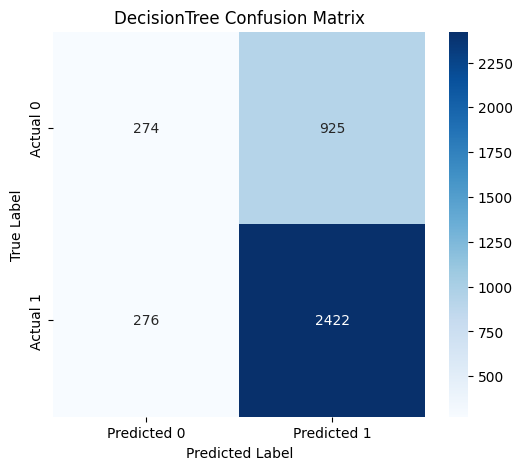

In [14]:
# DecisionTree 예측값 기반 혼동 행렬 생성
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,  # 색상 바 추가
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('DecisionTree Confusion Matrix')
plt.show()


70%대의 성능이 나오는 이유는 전부 y=1(취직함)으로 예측하기 때문으로 y값의 비율 차이로 발생한다고 추정됨

### oversampleing

In [25]:
counter = Counter(y)
print(counter)

smt = SMOTE(random_state=42)
X_new, y_new = smt.fit_resample(X, y)
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

counter = Counter(y_new)
print(counter)
counter = Counter(y_res)
print(counter)

Counter({1: 10732, 0: 4853})
Counter({0: 10732, 1: 10732})
Counter({0: 10732, 1: 10732})


C:\Users\Playdata\AppData\Local\Temp\ipykernel_26916\4203188219.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, ax=axes[0], palette="pastel")
C:\Users\Playdata\AppData\Local\Temp\ipykernel_26916\4203188219.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_res, ax=axes[1], palette="dark")


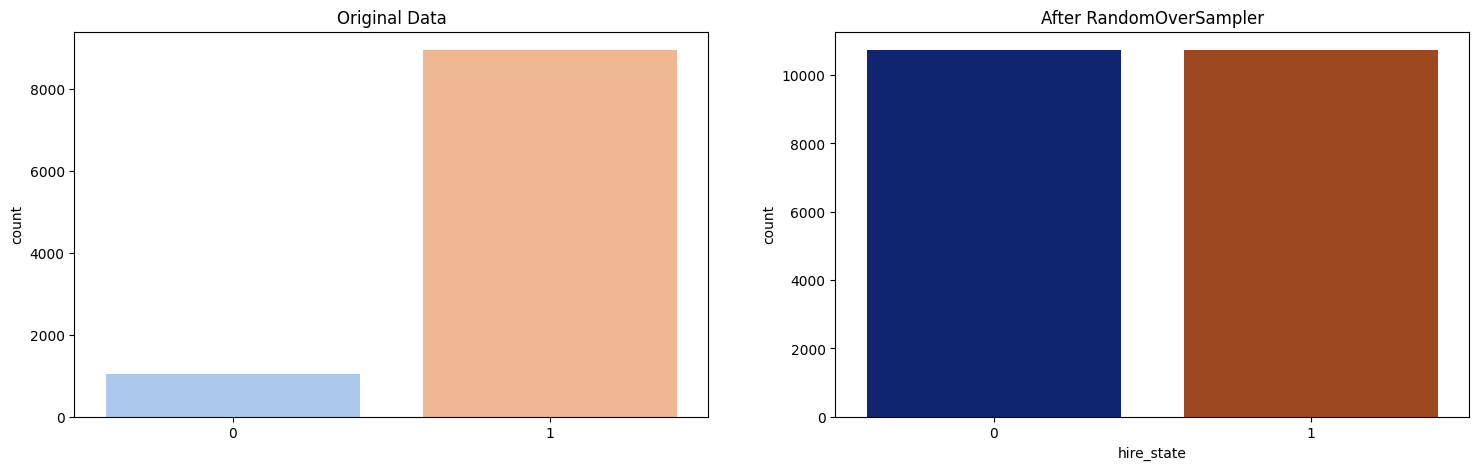

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# 원본 데이터 클래스 분포
sns.countplot(x=y, ax=axes[0], palette="pastel")
axes[0].set_title("Original Data")

# RandomOverSampler 적용 후 클래스 분포
sns.countplot(x=y_res, ax=axes[1], palette="dark")
axes[1].set_title("After RandomOverSampler")

plt.show()


SMOTE는 가장 가까운 값 사이에 직성을 만들고 그 안에서 새로운 값을 뽑는 방식으로 범주형 변수에 맞지 않아서 RandomOverSampler 사용

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, random_state=0)

In [27]:
dt_clf = DecisionTreeClassifier(random_state=0, max_depth=3)   # max_depth : 가지치기 (최대 깊이 지정)
dt_clf.fit(X_train, y_train)

print(dt_clf.score(X_train, y_train), dt_clf.score(X_test, y_test))

0.6087712759348988 0.5972791651136787


In [28]:
y_pred = dt_clf.predict(X_test)
confusion_matrix(y_test, y_pred, labels=[0, 1])

array([[1348, 1367],
       [ 794, 1857]])

그리드서치

최적의 하이퍼 파라미터를 선택하여 높은 정확도의 모델을 만들기 위해 그리드 서치 사용

In [24]:
skf = StratifiedKFold(n_splits=5)
dt_clf = DecisionTreeClassifier(random_state=0)
params = {
    "max_depth": [12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
}
gscv_tree = GridSearchCV (dt_clf, params, scoring ='accuracy', cv = skf)
gscv_tree.fit(X_train, y_train)
print(gscv_tree.best_estimator_)
# pd.DataFrame(gscv_tree.cv_results_)

KeyboardInterrupt: 

In [ ]:
# 랜덤 포레스트
rf_clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf_clf.fit(X_train, y_train)
print("Random Forest Accuracy:", rf_clf.score(X_test, y_test))

Random Forest Accuracy: 0.8583674990682072


In [24]:
skf = StratifiedKFold(n_splits=5)
rf_clf = RandomForestClassifier(random_state=0)
# params = {
#     "max_depth": [5,10,15,20,25,30,35],
#     "n_estimators": [100,200,300,400,500,800,1000]
# }
params = {
    "max_depth": [26,27,28,29,30,31,32,33,34],
    "n_estimators": [450,500,550,600,650,700]
}
gscv_rf = GridSearchCV (rf_clf, params, scoring ='accuracy', cv = skf)
gscv_rf.fit(X_train, y_train)
print(gscv_rf.best_estimator_)

RandomForestClassifier(max_depth=34, n_estimators=550, random_state=0)


In [23]:
pd.DataFrame(gscv_rf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.411443,0.010121,0.020357,0.000597,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.648758,0.646894,0.643789,0.641504,0.631873,0.642564,0.005900,47
1,0.792946,0.021246,0.036564,0.002976,5,200,"{'max_depth': 5, 'n_estimators': 200}",0.648758,0.644410,0.648447,0.643057,0.634048,0.643744,0.005333,44
2,1.167702,0.023728,0.054850,0.001679,5,300,"{'max_depth': 5, 'n_estimators': 300}",0.653416,0.642547,0.648758,0.640572,0.634358,0.643930,0.006605,43
3,1.598454,0.036300,0.079807,0.010289,5,400,"{'max_depth': 5, 'n_estimators': 400}",0.651863,0.642547,0.646894,0.639640,0.634669,0.643123,0.005908,46
4,2.003466,0.041828,0.092758,0.005912,5,500,"{'max_depth': 5, 'n_estimators': 500}",0.653106,0.642857,0.648447,0.639329,0.632495,0.643247,0.007146,45
5,3.200616,0.073565,0.146300,0.002856,5,800,"{'max_depth': 5, 'n_estimators': 800}",0.650000,0.643478,0.644720,0.641504,0.632495,0.642439,0.005714,48
6,3.961413,0.052801,0.178615,0.002159,5,1000,"{'max_depth': 5, 'n_estimators': 1000}",0.648137,0.644099,0.645342,0.642746,0.631563,0.642377,0.005692,49
7,0.758636,0.036442,0.033649,0.002227,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.708696,0.694410,0.707453,0.694315,0.685306,0.698036,0.008847,42
8,1.515033,0.138325,0.067491,0.003222,10,200,"{'max_depth': 10, 'n_estimators': 200}",0.704969,0.697516,0.711801,0.694936,0.694004,0.700645,0.006777,41
9,2.150137,0.072125,0.096304,0.005918,10,300,"{'max_depth': 10, 'n_estimators': 300}",0.709006,0.699068,0.713043,0.697111,0.691519,0.701950,0.007917,38


In [29]:
# xgboost
xgb_clf = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=0
)

xgb_clf.fit(X_train, y_train)

y_pred_train = xgb_clf.predict(X_train)
y_pred_test = xgb_clf.predict(X_test)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))
# print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))
confusion_matrix(y_test, y_pred_test, labels=[0, 1])

0.6741210088209716
0.6634364517331346
              precision    recall  f1-score   support

           0       0.68      0.63      0.65      2715
           1       0.65      0.70      0.67      2651

    accuracy                           0.66      5366
   macro avg       0.66      0.66      0.66      5366
weighted avg       0.66      0.66      0.66      5366



array([[1707, 1008],
       [ 798, 1853]], dtype=int64)

In [30]:
skf = StratifiedKFold(n_splits=5)
xgb_clf = XGBClassifier(random_state=0)
params = {
    "max_depth": [3,5,7,10,15,20,25],
    "n_estimators": [100, 300, 500],
    'learning_rate' : [0.01,0.05,0.1]
}
gscv_xg = GridSearchCV (xgb_clf, params, scoring ='accuracy', cv = skf)
gscv_xg.fit(X_train, y_train)
print(gscv_xg.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=20, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


In [34]:
skf = StratifiedKFold(n_splits=5)
xgb_clf = XGBClassifier(random_state=0)
params = {
    "max_depth": [18,19,20,21,22,23],
    "n_estimators": [400,450, 500,550,600,700],
    'learning_rate' : [0.05]
}
gscv_xg = GridSearchCV (xgb_clf, params, scoring ='accuracy', cv = skf)
gscv_xg.fit(X_train, y_train)
print(gscv_xg.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=23, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=700,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


In [35]:
skf = StratifiedKFold(n_splits=5)
xgb_clf = XGBClassifier(random_state=0)
params = {
    "max_depth": [23,24,25],
    "n_estimators": [650,700,800,1000],
    'learning_rate' : [0.05]
}
gscv_xg = GridSearchCV (xgb_clf, params, scoring ='accuracy', cv = skf)
gscv_xg.fit(X_train, y_train)
print(gscv_xg.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=23, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=800,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


In [32]:
pd.DataFrame(gscv_xg.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.180436,0.006167,0.005074,0.000435,0.01,3,100,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.630435,0.631677,0.622981,0.624107,0.622554,0.626351,0.003895,63
1,0.518502,0.022714,0.005011,0.000315,0.01,3,300,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.655901,0.644099,0.641925,0.644921,0.633737,0.644117,0.007100,61
2,0.828115,0.065859,0.005504,0.000552,0.01,3,500,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.660870,0.653727,0.645963,0.652066,0.645853,0.651696,0.005575,59
3,0.283682,0.020203,0.005204,0.000675,0.01,5,100,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.655901,0.631988,0.650932,0.641504,0.637154,0.643496,0.008784,62
4,0.782597,0.035522,0.005908,0.000585,0.01,5,300,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.666149,0.659006,0.663665,0.667599,0.659211,0.663126,0.003514,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,3.673918,0.069603,0.016322,0.002087,0.1,20,300,"{'learning_rate': 0.1, 'max_depth': 20, 'n_est...",0.806522,0.806832,0.805590,0.807083,0.797142,0.804634,0.003780,4
59,5.443889,0.077368,0.024132,0.002773,0.1,20,500,"{'learning_rate': 0.1, 'max_depth': 20, 'n_est...",0.807143,0.807453,0.804348,0.804598,0.797453,0.804199,0.003604,6
60,1.964846,0.148565,0.008242,0.001166,0.1,25,100,"{'learning_rate': 0.1, 'max_depth': 25, 'n_est...",0.808696,0.804658,0.803106,0.800870,0.791550,0.801776,0.005716,14
61,4.189157,0.066287,0.018003,0.002367,0.1,25,300,"{'learning_rate': 0.1, 'max_depth': 25, 'n_est...",0.806832,0.804037,0.801863,0.805530,0.799006,0.803454,0.002770,8


In [37]:
# LightGBM
from lightgbm import LGBMClassifier
skf = StratifiedKFold(n_splits=5)
lgbm_clf = LGBMClassifier(random_state=0, early_stopping_rounds=100)
params = {
    "n_estimators": [1000,1500,2000],
    'learning_rate' : [0.1,0.15,0.2,0.5]
}
gscv_lgbm = GridSearchCV (lgbm_clf, params, scoring ='accuracy', cv = skf)
gscv_lgbm.fit(X_train, y_train, eval_set=(X_test, y_test))
print(gscv_lgbm.best_estimator_)
pd.DataFrame(gscv_lgbm.cv_results_)

[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] Number of positive: 6465, number of negative: 6413
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 841
[LightGBM] [Info] Number of data points in the train set: 12878, number of used features: 35
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502019 -> initscore=0.008076
[LightGBM] [Info] Start training from score 0.008076
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[996]	valid_0's binary_logloss: 0.471651
[LightGBM] [Warning] e

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.765491,0.021304,0.031073,0.001533,0.1,1000,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.786646,0.786025,0.790373,0.792793,0.787512,0.788670,0.002543,6
1,0.991288,0.086752,0.039980,0.005023,0.1,1500,"{'learning_rate': 0.1, 'n_estimators': 1500}",0.787888,0.789130,0.791615,0.789376,0.792171,0.790036,0.001608,1
2,0.989509,0.081493,0.039817,0.004039,0.1,2000,"{'learning_rate': 0.1, 'n_estimators': 2000}",0.787888,0.789130,0.791615,0.789376,0.792171,0.790036,0.001608,1
3,0.630683,0.019075,0.022881,0.001632,0.15,1000,"{'learning_rate': 0.15, 'n_estimators': 1000}",0.786957,0.789441,0.792547,0.794967,0.783162,0.789415,0.004142,3
4,0.646376,0.018817,0.023720,0.002500,0.15,1500,"{'learning_rate': 0.15, 'n_estimators': 1500}",0.786957,0.789441,0.792547,0.794967,0.783162,0.789415,0.004142,3
5,0.685742,0.052163,0.024275,0.001837,0.15,2000,"{'learning_rate': 0.15, 'n_estimators': 2000}",0.786957,0.789441,0.792547,0.794967,0.783162,0.789415,0.004142,3
6,0.532945,0.027392,0.019730,0.003197,0.2,1000,"{'learning_rate': 0.2, 'n_estimators': 1000}",0.785714,0.783851,0.788820,0.790308,0.775707,0.784880,0.005116,7
7,0.529747,0.029764,0.017322,0.001141,0.2,1500,"{'learning_rate': 0.2, 'n_estimators': 1500}",0.785714,0.783851,0.788820,0.790308,0.775707,0.784880,0.005116,7
8,0.524308,0.022411,0.020594,0.005851,0.2,2000,"{'learning_rate': 0.2, 'n_estimators': 2000}",0.785714,0.783851,0.788820,0.790308,0.775707,0.784880,0.005116,7
9,0.236598,0.029743,0.007111,0.001011,0.5,1000,"{'learning_rate': 0.5, 'n_estimators': 1000}",0.779503,0.783851,0.771118,0.752097,0.767940,0.770902,0.010992,10


In [83]:
print(gscv_lgbm.best_estimator_)

LGBMClassifier(early_stopping_rounds=100, n_estimators=1500, random_state=0)


위의 4가지 모델의 최적 파라미터를 사용하여 5-foldvalidation을 이용하여 정확도, 정밀도, 재현율을 비교하여 최종 모델을 선정

In [42]:
# 최종 모델 비교
dt_clf = DecisionTreeClassifier(max_depth=25, random_state=0)
rf_clf = RandomForestClassifier(max_depth=34, n_estimators=550, random_state=0)
xgb_clf = XGBClassifier(learning_rate=0.05, max_depth=23, n_estimators=800, random_state=0)
lgbm_clf = LGBMClassifier(n_estimators=1500, learning_rate=0.1, random_state=0)

stratified_kfold = StratifiedKFold(n_splits=5)

# k번 반복하면서 평가한 정확도를 저장할 배열
dt_accuracy = []
dt_precision = []
dt_recall = []
rf_accuracy = []
rf_precision = []
rf_recall = []
xgb_accuracy = []
xgb_precision = []
xgb_recall = []
lgbm_accuracy = []
lgbm_precision = []
lgbm_recall = []

for train_index, val_index in stratified_kfold.split(X_new, y_new):
    X_train, y_train = X_new.iloc[train_index], y_new.iloc[train_index]
    X_val, y_val = X_new.iloc[val_index], y_new.iloc[val_index]

    dt_clf.fit(X_train, y_train)
    rf_clf.fit(X_train, y_train)
    xgb_clf.fit(X_train, y_train)
    lgbm_clf.fit(X_train, y_train)

    y_pred_dt = dt_clf.predict(X_val)   # 검증 데이터로 예측
    y_pred_rf = rf_clf.predict(X_val)   # 검증 데이터로 예측
    y_pred_xgb = xgb_clf.predict(X_val)   # 검증 데이터로 예측
    y_pred_lgbm = lgbm_clf.predict(X_val)   # 검증 데이터로 예측

    dt_accuracy.append(accuracy_score(y_val, y_pred_dt)) 
    rf_accuracy.append(accuracy_score(y_val, y_pred_rf)) 
    xgb_accuracy.append(accuracy_score(y_val, y_pred_xgb)) 
    lgbm_accuracy.append(accuracy_score(y_val, y_pred_lgbm)) 
    
    dt_precision.append(precision_score(y_val, y_pred_dt)) 
    rf_precision.append(precision_score(y_val, y_pred_rf)) 
    xgb_precision.append(precision_score(y_val, y_pred_xgb)) 
    lgbm_precision.append(precision_score(y_val, y_pred_lgbm)) 
    
    dt_recall.append(recall_score(y_val, y_pred_dt)) 
    rf_recall.append(recall_score(y_val, y_pred_rf)) 
    xgb_recall.append(recall_score(y_val, y_pred_xgb)) 
    lgbm_recall.append(recall_score(y_val, y_pred_lgbm)) 


print("의사결정나무 정확도:", np.mean(dt_accuracy))
print("의사결정나무 정밀도:", np.mean(dt_precision))
print("의사결정나무 재현율:", np.mean(dt_recall))

print("랜덤포레스트 정확도:", np.mean(rf_accuracy))
print("랜덤포레스트 정밀도:", np.mean(rf_precision))
print("랜덤포레스트 재현율:", np.mean(rf_recall))

print("xgboost 정확도:", np.mean(xgb_accuracy))
print("xgboost 정밀도:", np.mean(xgb_precision))
print("xgboost 재현율:", np.mean(xgb_recall))

print("lightGBM 정확도:", np.mean(lgbm_accuracy))
print("lightGBM 정밀도:", np.mean(lgbm_precision))
print("lightGBM 재현율:", np.mean(lgbm_recall))

[LightGBM] [Info] Number of positive: 8586, number of negative: 8585
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002269 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4431
[LightGBM] [Info] Number of data points in the train set: 17171, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500029 -> initscore=0.000116
[LightGBM] [Info] Start training from score 0.000116
[LightGBM] [Info] Number of positive: 8586, number of negative: 8585
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4412
[LightGBM] [Info] Number of data points in the train set: 17171, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500029 -> initscore=0.000116
[LightGBM] [Info] Start training from score 0.000116
[LightGBM] [Info] Nu

랜덤포레스트 최종모델로 선정

----------------------
추가적인 모델 사용

- 범주형 변수를 라벨인코딩을 하면 로지스틱과 svm과 같은 수리적인 모델에서는 사용하면 안되지만 그냥 한번 해봄

In [21]:
# 로지스틱
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled, y_train)

print(lr_clf.score(X_train_scaled, y_train), lr_clf.score(X_test_scaled, y_test))

0.7064231581562928 0.689340290719344


In [22]:
# SVM
from sklearn.svm import SVC

model = SVC(kernel="rbf")   # kernel 기본값 "rbf"
model.fit(X_train, y_train)

model.score(X_train, y_train), model.score(X_test, y_test)

(0.5663436451733135, 0.5566530003727171)

In [23]:
# MLP
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(100,100,100,100,100),
    activation='relu',
    solver='adam',
    max_iter=5000,
    random_state=42
)
mlp.fit(X_train, y_train)

pred = mlp.predict(X_test)
print(accuracy_score(y_test, pred))
confusion_matrix(y_test, pred, labels=[0, 1])

0.7083488632128214


array([[1873,  779],
       [ 786, 1928]], dtype=int64)